# Polynomial (1 variables - deg3)

## Imports

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

## Reading Data

In [36]:
df = pd.read_csv("FuelConsumption.csv")
df.describe()
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

## choose the cdf

In [37]:
cdf = df[['FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

## 80 - 20 data setting

In [38]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

print(train)
print(test)

      FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
0                           33           196
1                           29           221
3                           25           255
5                           28           230
6                           28           232
...                        ...           ...
1062                        24           271
1063                        25           264
1064                        24           271
1065                        25           260
1066                        22           294

[868 rows x 2 columns]
      FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
2                           48           136
4                           27           244
11                          27           239
18                          18           359
21                          30           214
...                        ...           ...
1031                        30           216
1034                        34           189
1035                        34 

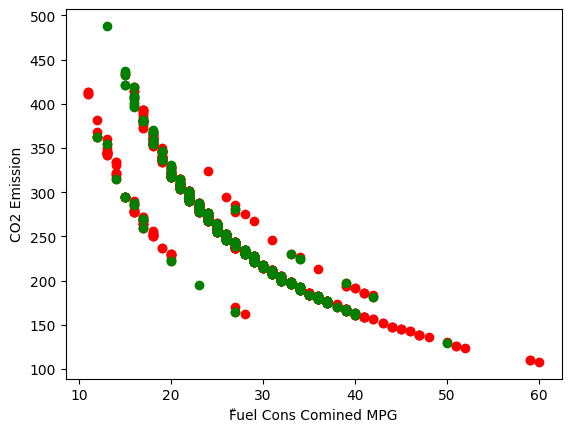

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,color='red')
ax1.scatter(test.FUELCONSUMPTION_COMB_MPG, test.CO2EMISSIONS, color='green')
plt.xlabel('ّFuel Cons Comined MPG')
plt.ylabel('CO2 Emission')
plt.show()


## Polynomial Regression >>>> Data Preparation

In [39]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)

train_x_poly

array([[1.0000e+00, 3.3000e+01, 1.0890e+03, 3.5937e+04],
       [1.0000e+00, 2.9000e+01, 8.4100e+02, 2.4389e+04],
       [1.0000e+00, 2.5000e+01, 6.2500e+02, 1.5625e+04],
       ...,
       [1.0000e+00, 2.4000e+01, 5.7600e+02, 1.3824e+04],
       [1.0000e+00, 2.5000e+01, 6.2500e+02, 1.5625e+04],
       [1.0000e+00, 2.2000e+01, 4.8400e+02, 1.0648e+04]])

In [40]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)

print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.00000000e+00 -1.04427071e+01 -1.93984686e-02  1.48083590e-03]]
Intercept:  [512.58109846]


# Evaluation (Prediction)

In [41]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)


print("MAE: ", np.mean(test_y_ - test_y))
print("Residual Sum of Squares: ", np.mean((test_y_ - test_y)**2))
print("Variance Score:", clf.score(test_x_poly, test_y))

MAE:  -0.6927404911115997
Residual Sum of Squares:  595.6033177291382
Variance Score: 0.8544178793534188
